In [101]:
# Much of this material follows 
#Hands-On Machine Learning with
#Scikit-Learn and TensorFlow
#Concepts, Tools, and Techniques to Build Intelligent Systems
￼#--------------
#Aurélien Géron

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# to make the visuals works on MACOS
#!pip install graphviz
#!brew install graphviz

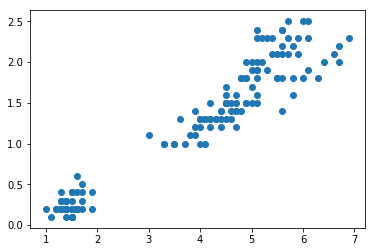

In [102]:
# We can use the standard Iris dataset to test the classification methods
from sklearn.datasets import load_iris
iris=load_iris()
X=iris.data[:,2:]
Y=iris.target
plt.scatter(X[:,0],X[:,1])

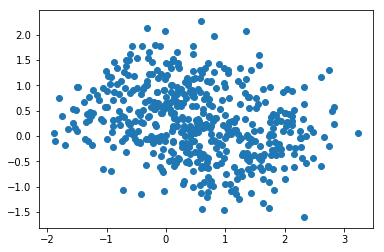

In [86]:
# Or use the moons dataset 
from sklearn.datasets import make_moons
data=make_moons(n_samples=500, noise=0.5)
X=data[0]
Y=data[1]
plt.scatter(X[:,0],X[:,1])

In [103]:
#---------------------
# This function plots both the training set 
# and the contur plot of the classifier bounderies
#---------------------
# Provide 2D train set X  
# Provide 1D target Y 
# Provide Number of classes in Y
# Provide Color Coding 

def plot_cont(clf,X,Y,n_classes=3,plot_colors = "ryb",plot_step= 0.02):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(Y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=color, label=Y[i],
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu,alpha=0.5)

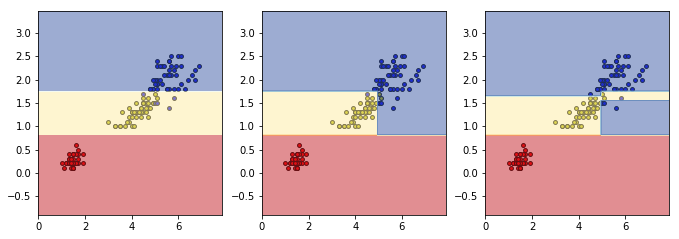

In [109]:
# Provide depth of the tree range 
# Provide number of classes

# Decision Tree case, for a range of depths

# DecisionTreeClassifier(criterion=’gini’, splitter=’best’,
# max_depth=None, min_samples_split=2, min_samples_leaf=1, 
# min_weight_fraction_leaf=0.0, max_features=None, random_state=None, 
# max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, class_weight=None, presort=False)

n_class=3
n_range=range(2,5)
plt.subplots(1,len(n_range),figsize=(10,10))
for n in n_range:
    tree_clf=DecisionTreeClassifier(max_depth=n,random_state=1,criterion='gini')
    tree_clf.fit(X,Y)
    plt.subplot(1,len(n_range), n-min(n_range)+1, aspect=2)
    plot_cont(tree_clf,X,Y,n_classes=n_class)

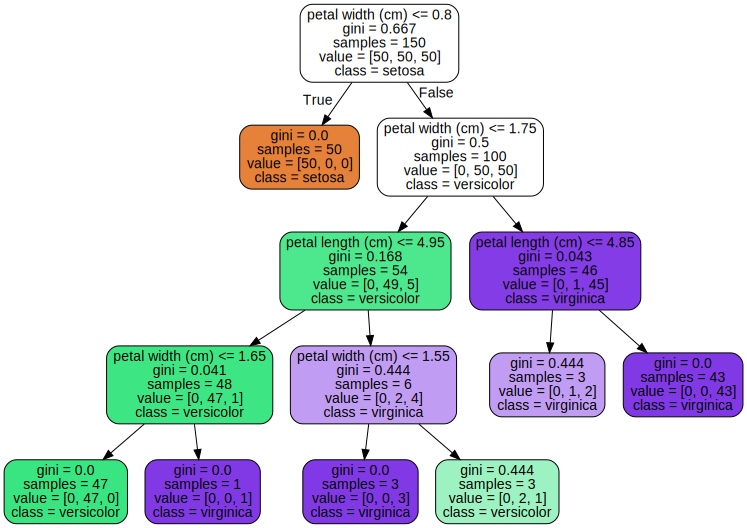

In [110]:
# Visualize Decision Tree shape

from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree_clf, out_file="mytree.dot",\
                feature_names=iris.feature_names[2:],
                class_names=iris.target_names,
                rounded=True,
                filled=True)
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

[0.47420877 0.52579123]
[0.46979254 0.53020746]
[0.47126206 0.52873794]


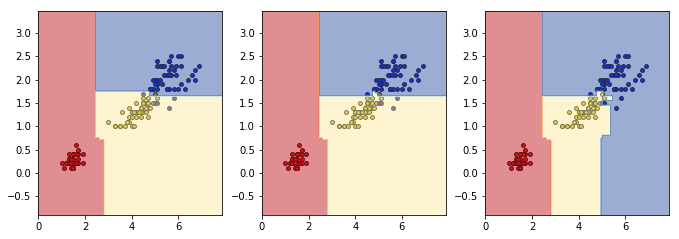

In [111]:
# Random Forest for different depths
# We can also print the feature importance for each case

n_class=3
n_range=range(2,5)
plt.subplots(1,len(n_range),figsize=(10,10))
for n in n_range:
    rf_clf=RandomForestClassifier(max_depth=n,random_state=1)
    rf_clf.fit(X,Y)
    plt.subplot(1,len(n_range), n-min(n_range)+1, aspect=2)
    plot_cont(rf_clf,X,Y,n_classes=n_class)
    print(rf_clf.feature_importances_)

[0.47126206 0.52873794]
[0.47126206 0.52873794]
[0.47126206 0.52873794]


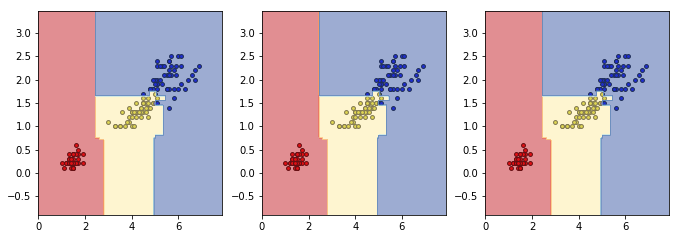

In [112]:
# Adaotive Boost Classifier for different tree depth. 
# Overfitting is present in the Moons Data case.

from sklearn.ensemble import AdaBoostClassifier

n_class=3
n_range=range(1,4)
plt.subplots(1,len(n_range),figsize=(10,10))
for n in n_range:
    ada_clf = AdaBoostClassifier(
         DecisionTreeClassifier(max_depth=1), n_estimators=100,
         algorithm="SAMME.R", learning_rate=0.02
     )
    ada_clf.fit(X, Y)
    plt.subplot(1,len(n_range), n-min(n_range)+1, aspect=2)
    plot_cont(rf_clf,X,Y,n_classes=n_class)
    print(rf_clf.feature_importances_)